In [1]:
#Dependencies
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

C:\Users\skyla\Anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\skyla\Anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\skyla\Anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\skyla\Anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\f

In [2]:
#Read CSV file
df = pd.read_csv("charity_data.csv")
df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
#Set EIN as index
df.set_index("EIN", inplace = True)
df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
EIN,,,,,,,,,,,
10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
#Create new df for names and drop NAME from df
names_df = pd.DataFrame(data = df["NAME"], columns = ["NAME"])
df.drop(columns = "NAME", inplace = True)
df.head(10)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
EIN,,,,,,,,,,
10520599,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
10531628,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
10547893,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
10553066,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
10556103,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
10556855,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1
10558440,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,1
10566033,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,7508025,1
10570430,T7,Independent,C1000,ProductDev,Trust,1,1-9999,N,94389,1


In [5]:
df.SPECIAL_CONSIDERATIONS.value_counts()

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [6]:
#Change SPECIAL_CONSIDERATIONS to Bool
df.SPECIAL_CONSIDERATIONS = df.SPECIAL_CONSIDERATIONS.apply(lambda x: 0 if x == "N" else 1)
df.SPECIAL_CONSIDERATIONS.value_counts()

0    34272
1       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [7]:
app_count = df.APPLICATION_TYPE.value_counts()
affil_count = df.AFFILIATION.value_counts()
class_count = df.CLASSIFICATION.value_counts()
use_count = df.USE_CASE.value_counts()
org_count = df.ORGANIZATION.value_counts()
inc_count = df.INCOME_AMT.value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

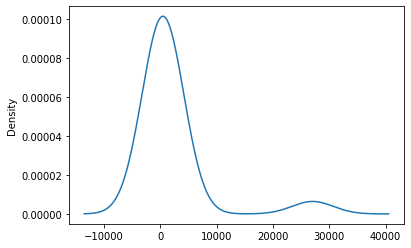

In [8]:
app_count.plot.density()
app_count

In [9]:
#Bucket app type
app_replace = list(app_count[app_count < 1000].index)

for x in app_replace:
    df.APPLICATION_TYPE = df.APPLICATION_TYPE.replace(x, "Other")

df.APPLICATION_TYPE.value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

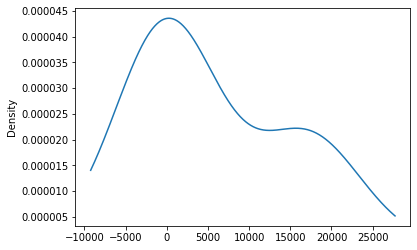

In [10]:
affil_count.plot.density()
affil_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C1245        1
C4200        1
C1732        1
C2190        1
Name: CLASSIFICATION, Length: 71, dtype: int64

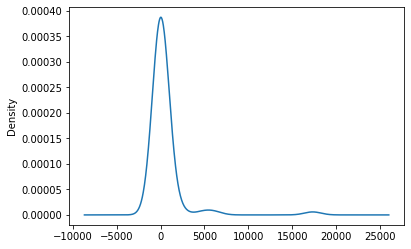

In [11]:
class_count.plot.density()
class_count

In [12]:
#Bucket classification
class_replace = list(class_count[class_count < 1000].index)

for x in class_replace:
    df.CLASSIFICATION = df.CLASSIFICATION.replace(x, "Other")

df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

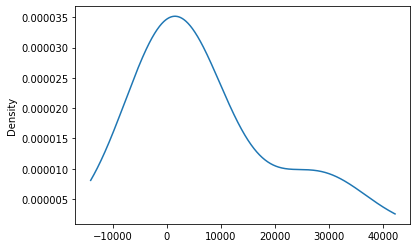

In [13]:
use_count.plot.density()
use_count

Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64

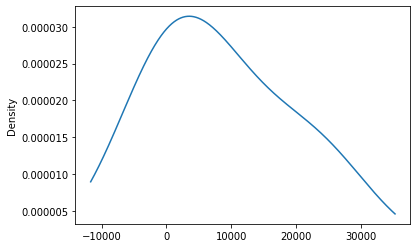

In [14]:
org_count.plot.density()
org_count

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

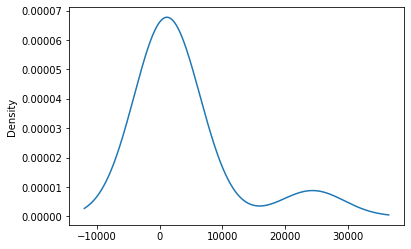

In [15]:
inc_count.plot.density()
inc_count

In [16]:
#Encode columns
copy_df = df.copy()
le = LabelEncoder()

copy_df.APPLICATION_TYPE = le.fit_transform(copy_df.APPLICATION_TYPE)
copy_df.AFFILIATION = le.fit_transform(copy_df.AFFILIATION)
copy_df.CLASSIFICATION = le.fit_transform(copy_df.CLASSIFICATION)
copy_df.USE_CASE = le.fit_transform(copy_df.USE_CASE)
copy_df.ORGANIZATION = le.fit_transform(copy_df.ORGANIZATION)
copy_df.INCOME_AMT = le.fit_transform(copy_df.INCOME_AMT)

In [17]:
copy_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
EIN,,,,,,,,,,
10520599,0,2,0,4,0,1,0,0,5000,1
10531628,2,2,2,3,1,1,1,0,108590,1
10547893,4,0,4,4,0,1,0,0,5000,0
10553066,2,0,2,3,3,1,2,0,6692,1
10556103,2,2,0,1,3,1,3,0,142590,1


In [18]:
#Split target column
y = copy_df.IS_SUCCESSFUL
X = copy_df.drop("IS_SUCCESSFUL", 1)

In [19]:
#Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [20]:
# Create a Standard Scaler instance
scaler = StandardScaler()

# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [21]:
#Generate model
model = tf.keras.models.Sequential()

In [22]:
# Add the input and hidden layer
number_inputs = 9
number_hidden_nodes = 90

model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

model.add(tf.keras.layers.Dense(units=5, activation ="sigmoid"))

# Add the output layer that uses a probability activation function
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 90)                900       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 455       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 1,361
Trainable params: 1,361
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compile the Sequential model together and customize metrics
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
fit_model = model.fit(X_train_scaled, y_train, epochs=100, shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
25724/25724 [==============================] - 0s 18us/sample - loss: 0.6030 - acc: 0.7028
Epoch 2/100
25724/25724 [==============================] - 0s 16us/sample - loss: 0.5785 - acc: 0.7242
Epoch 3/100
25724/25724 [==============================] - 0s 16us/sample - loss: 0.5746 - acc: 0.7255
Epoch 4/100
25724/25724 [==============================] - 0s 15us/sample - loss: 0.5727 - acc: 0.7266
Epoch 5/100
25724/25724 [==============================] - 0s 16us/sample - loss: 0.5718 - acc: 0.7276
Epoch 6/100
25724/25724 [==============================] - 0s 16us/sample - loss: 0.5711 - acc: 0.7276
Epoch 7/100
25724/25724 [==============================] - 0s 16us/sample - loss: 0.5701 - acc: 0.7276
Epoch 8/100
25724/25724 [==============================] - 0s 16us/sample - loss: 0.5698 - acc: 0.7282
Epoch 9/100
25724/25724 [==============================] - 0s 16us/sample - loss: 

25724/25724 [==============================] - 0s 17us/sample - loss: 0.5499 - acc: 0.7350
Epoch 77/100
25724/25724 [==============================] - 0s 17us/sample - loss: 0.5505 - acc: 0.7345
Epoch 78/100
25724/25724 [==============================] - 0s 17us/sample - loss: 0.5503 - acc: 0.7347
Epoch 79/100
25724/25724 [==============================] - 1s 23us/sample - loss: 0.5504 - acc: 0.7342
Epoch 80/100
25724/25724 [==============================] - 0s 18us/sample - loss: 0.5501 - acc: 0.7348
Epoch 81/100
25724/25724 [==============================] - 0s 17us/sample - loss: 0.5502 - acc: 0.7355
Epoch 82/100
25724/25724 [==============================] - 0s 17us/sample - loss: 0.5504 - acc: 0.7334
Epoch 83/100
25724/25724 [==============================] - 0s 17us/sample - loss: 0.5497 - acc: 0.7346
Epoch 84/100
25724/25724 [==============================] - 0s 17us/sample - loss: 0.5503 - acc: 0.7336
Epoch 85/100
25724/25724 [==============================] - 0s 16us/sample - 

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)
Neural_network_accuracy = model_accuracy
Neural_network_accuracy

8575/8575 - 0s - loss: 0.5645 - acc: 0.7221


0.7220991